In [5]:
import pandas as pd

# Charger le dataset
data = pd.read_csv("diabetes.csv")

# Aperçu des données
print('First lines of dataset') 
print(data.head())

# Résumé statistique
print('\n')
print('Data overview')
print(data.describe())

# Identifier les valeurs manquantes
print('\n')
print('Missing values')
print(data.isnull().sum())


First lines of dataset
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


Data overview
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      

In [6]:
# Résumé statistique du dataset
print("Résumé statistique des données :")
print(data.describe())

# Vérification des colonnes uniques pour les catégories (si applicable)
print("\nValeurs uniques par colonne :")
for col in data.columns:
    print(f"{col}: {data[col].nunique()} valeurs uniques")


Résumé statistique des données :
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
mi

<Figure size 1200x1000 with 0 Axes>

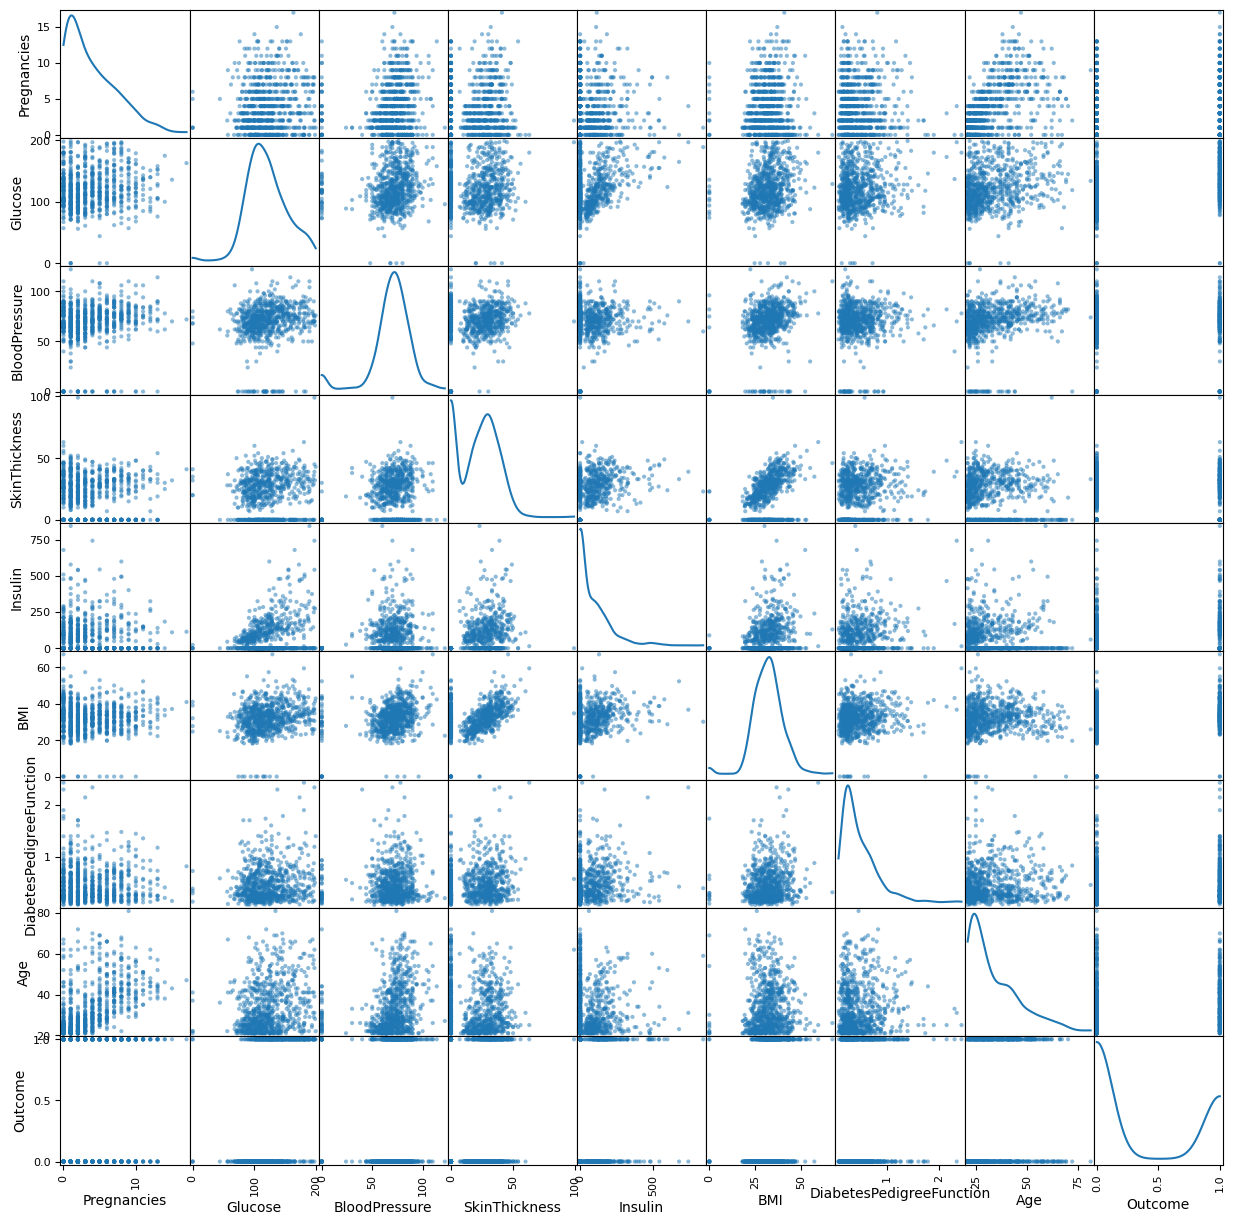

In [7]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

plt.figure(figsize=(12,10))
scatter_matrix(data, alpha=0.5, figsize=(15,15), diagonal='kde')
plt.show()

In [11]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# 1- Univariate Selection
X = data.drop("Outcome",axis=1)
y = data["Outcome"]
univariate = SelectKBest(score_func= f_classif, k=5)
X_new_univariate = univariate.fit_transform(X,y)
print("\nScores Univariate Selection : ")
print(univariate.scores_)

# 2- PCA
pca = PCA(n_components=5)
X_new_pca = pca.fit_transform(X)
print("\nExplained Variance Ration (PCA):")
print(pca.explained_variance_ratio_)

# 3- Recursive Feature Elimination (RFE)
model = RandomForestClassifier()
rfe = RFE(estimator=model, n_features_to_select=5) # selectionner 5 features
rfe = rfe.fit(X,y)
print("\nRFE Support ( 1 = selected) : ")
print(rfe.support_)
print("RFE Ranking: ")
print(rfe.ranking_)

# 4- Feature Importance (Random forest)
model.fit(X,y)
importances = model.feature_importances_
print("\nFeature Importance (Random Forest)")
for col, importance in zip(X.columns, importances):
    print(f"{col}: {importance}")




Scores Univariate Selection : 
[ 39.67022739 213.16175218   3.2569504    4.30438091  13.28110753
  71.7720721   23.8713002   46.14061124]

Explained Variance Ration (PCA):
[0.88854663 0.06159078 0.02579012 0.01308614 0.00744094]

RFE Support ( 1 = selected) : 
[False  True  True False False  True  True  True]
RFE Ranking: 
[2 1 1 4 3 1 1 1]

Feature Importance (Random Forest)
Pregnancies: 0.08505625133904945
Glucose: 0.26047816990400885
BloodPressure: 0.08639739308396051
SkinThickness: 0.07102885443543806
Insulin: 0.07103915501103696
BMI: 0.1595011577360501
DiabetesPedigreeFunction: 0.12329736528239624
Age: 0.14320165320805978


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

print("\nDonnees Normalisees (premieres lignes) : ")
print(X_normalized[:5])


Donnees Normalisees (premieres lignes) : 
[[0.35294118 0.74371859 0.59016393 0.35353535 0.         0.50074516
  0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 0.29292929 0.         0.39642325
  0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 0.         0.         0.34724292
  0.25362938 0.18333333]
 [0.05882353 0.44723618 0.54098361 0.23232323 0.11111111 0.41877794
  0.03800171 0.        ]
 [0.         0.68844221 0.32786885 0.35353535 0.19858156 0.64232489
  0.94363792 0.2       ]]


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from joblib import dump

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM (Linear Kernel)": SVC(kernel='linear', probability=True),
    "SVM (Polynomial Kernel)": SVC(kernel='poly', probability=True),
    "SVM (RBF Kernel)": SVC(kernel='rbf', probability=True),
    "ANN": MLPClassifier(max_iter=1000, random_state=42)
}

for name, model in models.items():
    print(f"Entraînement du modèle {name}...")
    model.fit(X_train, y_train)
    dump(model, f"{name.replace(' ', '_')}.joblib")  # Sauvegarder le modèle
    print(f"Modèle {name} sauvegardé avec succès.\n")


Entraînement du modèle KNN...
Modèle KNN sauvegardé avec succès.

Entraînement du modèle Decision Tree...
Modèle Decision Tree sauvegardé avec succès.

Entraînement du modèle Naive Bayes...
Modèle Naive Bayes sauvegardé avec succès.

Entraînement du modèle SVM (Linear Kernel)...
Modèle SVM (Linear Kernel) sauvegardé avec succès.

Entraînement du modèle SVM (Polynomial Kernel)...
Modèle SVM (Polynomial Kernel) sauvegardé avec succès.

Entraînement du modèle SVM (RBF Kernel)...
Modèle SVM (RBF Kernel) sauvegardé avec succès.

Entraînement du modèle ANN...
Modèle ANN sauvegardé avec succès.



In [16]:
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, confusion_matrix, classification_report

# Charger les modèles sauvegardés et évaluer leur performance
for name, model in models.items():
    print(f"Évaluation du modèle {name}...")

    # Prédictions sur les données de test
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    # Métriques
    acc = accuracy_score(y_test, y_pred)
    ll = log_loss(y_test, y_proba) if y_proba is not None else "Non applicable"
    auc = roc_auc_score(y_test, y_proba[:, 1]) if y_proba is not None else "Non applicable"
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Affichage des résultats
    print(f"\nModèle : {name}")
    print(f"Accuracy : {acc:.2f}")
    print(f"Log Loss : {ll}")
    print(f"AUC : {auc}")
    print(f"Confusion Matrix :\n{cm}")
    print(f"Classification Report :\n{report}\n")


Évaluation du modèle KNN...

Modèle : KNN
Accuracy : 0.69
Log Loss : 0.9641185120933778
AUC : 0.7640036730945822
Confusion Matrix :
[[78 21]
 [27 28]]
Classification Report :
              precision    recall  f1-score   support

           0       0.74      0.79      0.76        99
           1       0.57      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.68      0.69      0.68       154


Évaluation du modèle Decision Tree...

Modèle : Decision Tree
Accuracy : 0.74
Log Loss : 9.361987893277181
AUC : 0.7373737373737372
Confusion Matrix :
[[74 25]
 [15 40]]
Classification Report :
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.74       154
   macro avg       0.72      0.74      0.73       154
weighted avg       0.75      0.

In [18]:
# Initialiser un DataFrame vide pour stocker les performances des modèles
results = pd.DataFrame(columns=["Modèle", "Accuracy", "Log Loss", "AUC"])

# Comparer les performances
for name, model in models.items():
    print(f"Comparaison pour le modèle {name}...")

    # Prédictions et probabilités
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    # Calcul des métriques
    acc = accuracy_score(y_test, y_pred)
    ll = log_loss(y_test, y_proba) if y_proba is not None else None
    auc = roc_auc_score(y_test, y_proba[:, 1]) if y_proba is not None else None

    # Ajouter les résultats au DataFrame
    results = pd.concat(
        [
            results,
            pd.DataFrame(
                {"Modèle": [name], "Accuracy": [acc], "Log Loss": [ll], "AUC": [auc]}
            ),
        ],
        ignore_index=True,
    )

# Affichage des résultats
print("\nComparaison des performances des modèles :")
print(results)


Comparaison pour le modèle KNN...
Comparaison pour le modèle Decision Tree...
Comparaison pour le modèle Naive Bayes...
Comparaison pour le modèle SVM (Linear Kernel)...
Comparaison pour le modèle SVM (Polynomial Kernel)...
Comparaison pour le modèle SVM (RBF Kernel)...
Comparaison pour le modèle ANN...

Comparaison des performances des modèles :
                    Modèle  Accuracy  Log Loss       AUC
0                      KNN  0.688312  0.964119  0.764004
1            Decision Tree  0.740260  9.361988  0.737374
2              Naive Bayes  0.766234  0.555092  0.825344
3      SVM (Linear Kernel)  0.759740  0.503944  0.813223
4  SVM (Polynomial Kernel)  0.779221  0.533596  0.787879
5         SVM (RBF Kernel)  0.746753  0.497450  0.818549
6                      ANN  0.733766  0.513685  0.810652


/tmp/ipykernel_35410/2334778927.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat(


In [19]:
from joblib import load

# Charger les modèles sauvegardés
loaded_models = {}
for name in models.keys():
    loaded_models[name] = load(f"{name.replace(' ', '_')}.joblib")
    print(f"Modèle {name} chargé avec succès.")

# Prédire les classes avec chaque modèle
predictions = {}
for name, model in loaded_models.items():
    print(f"Prédictions pour le modèle {name}...")
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    print(f"Prédictions : {y_pred[:10]} (les 10 premières valeurs)\n")

# Comparer les prédictions entre les modèles
for name, y_pred in predictions.items():
    acc = accuracy_score(y_test, y_pred)
    print(f"Modèle : {name}, Accuracy : {acc:.2f}")


Modèle KNN chargé avec succès.
Modèle Decision Tree chargé avec succès.
Modèle Naive Bayes chargé avec succès.
Modèle SVM (Linear Kernel) chargé avec succès.
Modèle SVM (Polynomial Kernel) chargé avec succès.
Modèle SVM (RBF Kernel) chargé avec succès.
Modèle ANN chargé avec succès.
Prédictions pour le modèle KNN...
Prédictions : [0 0 0 1 1 0 0 1 1 0] (les 10 premières valeurs)

Prédictions pour le modèle Decision Tree...
Prédictions : [0 0 0 0 0 1 0 0 0 1] (les 10 premières valeurs)

Prédictions pour le modèle Naive Bayes...
Prédictions : [0 0 0 0 1 1 0 1 0 1] (les 10 premières valeurs)

Prédictions pour le modèle SVM (Linear Kernel)...
Prédictions : [0 0 0 0 0 0 0 1 1 1] (les 10 premières valeurs)

Prédictions pour le modèle SVM (Polynomial Kernel)...
Prédictions : [0 0 0 0 0 1 0 0 1 1] (les 10 premières valeurs)

Prédictions pour le modèle SVM (RBF Kernel)...
Prédictions : [0 0 0 0 0 0 0 1 1 1] (les 10 premières valeurs)

Prédictions pour le modèle ANN...
Prédictions : [0 0 0 0 0 1 

In [21]:
from sklearn.ensemble import StackingClassifier

# Stacking avec plusieurs modèles
estimators = [
    ('knn', KNeighborsClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('nb', GaussianNB()),
]
stacking_model = StackingClassifier(estimators=estimators, final_estimator=SVC(kernel="linear", probability=True))
stacking_model.fit(X_train, y_train)

# Évaluation
stacking_acc = accuracy_score(y_test, stacking_model.predict(X_test))
print(f"Stacking Accuracy : {stacking_acc:.2f}")


Stacking Accuracy : 0.78


In [22]:
from sklearn.ensemble import GradientBoostingClassifier

# Boosting avec Gradient Boosting
boosting_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
boosting_model.fit(X_train, y_train)

# Évaluation
boosting_acc = accuracy_score(y_test, boosting_model.predict(X_test))
print(f"Boosting Accuracy : {boosting_acc:.2f}")


Boosting Accuracy : 0.75


In [25]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Bagging avec un Decision Tree
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)

# Évaluation
bagging_acc = accuracy_score(y_test, bagging_model.predict(X_test))
print(f"Bagging Accuracy : {bagging_acc:.2f}")


Bagging Accuracy : 0.70


In [26]:
ensemble_results = pd.DataFrame({
    "Technique": ["Bagging", "Stacking", "Boosting"],
    "Accuracy": [bagging_acc, stacking_acc, boosting_acc]
})

print("\nRésultats des techniques d'ensemble learning :")
print(ensemble_results)




Résultats des techniques d'ensemble learning :
  Technique  Accuracy
0   Bagging  0.701299
1  Stacking  0.779221
2  Boosting  0.746753


In [27]:
# Résultats des modèles individuels
individual_results = results[["Modèle", "Accuracy"]]

# Résultats des techniques d'ensemble learning
ensemble_results = pd.DataFrame({
    "Modèle": ["Bagging", "Stacking", "Boosting"],
    "Accuracy": [bagging_acc, stacking_acc, boosting_acc]
})

# Combiner les deux DataFrames pour comparaison
final_results = pd.concat([individual_results, ensemble_results], ignore_index=True)

# Trier les résultats par précision
final_results = final_results.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

# Afficher les résultats
print("\nComparaison finale des performances :")
print(final_results)



Comparaison finale des performances :
                    Modèle  Accuracy
0                 Stacking  0.779221
1  SVM (Polynomial Kernel)  0.779221
2              Naive Bayes  0.766234
3      SVM (Linear Kernel)  0.759740
4         SVM (RBF Kernel)  0.746753
5                 Boosting  0.746753
6            Decision Tree  0.740260
7                      ANN  0.733766
8                  Bagging  0.701299
9                      KNN  0.688312
